In [1]:
import mne
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from braindecode.datasets import (create_from_mne_raw, create_from_mne_epochs)

data_path = "C:/Users/vapor/Documents/Jupyter/Thesis/ERP_CORE"
task = "N170"
number_of_subjects = 40

In [3]:
def load_data(data_path, task, number_of_subjects):
    ## first create list of data paths, then read data with mne, returns list of raw data
    erp_core_paths = []
    for i in range(1,number_of_subjects+1):
        erp_core_paths.append(data_path + "/"+task+"/"+str(i)+"/"+str(i)+"_"
                              +task+"_shifted_ds_reref_ucbip_hpfilt_ica_weighted.set")
        
    list_of_raws = [mne.io.read_raw_eeglab(path, preload=True) for path in erp_core_paths]
    return list_of_raws

def epoch_raw(i, list_of_raws):
    ## take list of raws and index to create a dataframe with the epoch and subjectID
    ## custom mappings for the different ERP paradigms
    # N170
    custom_mapping = dict((str(i), 0) for i in range(0,41))
    custom_mapping.update(dict((str(i), 1) for i in range(41,81)))
    # N400
    #custom_mapping = {'211': 0, '212': 0, '221': 1, '222': 1} 
    # P300
    #custom_mapping = {'111': 0, '112': 0, '211': 0, '212': 0, '121': 1, '122': 1, '221': 1, '222': 1}
    (events_from_annot, event_dict) = mne.events_from_annotations(list_of_raws[i], 
                                                                  event_id=custom_mapping)
    epoch = mne.Epochs(list_of_raws[i], events_from_annot, event_dict,tmin=-0.20,tmax=0.75, 
                       baseline=None, picks=range(0,28))
    epoch = epoch.to_data_frame()
    epoch["subjectID"]=i+1
    return epoch

In [4]:
## load data, will use braindecode for loading the data in the future
list_of_raws = load_data(data_path, task, number_of_subjects)
list_of_epochs = [epoch_raw(i, list_of_raws) for i in range(len(list_of_raws))]
df_epochs = pd.concat(list_of_epochs, axis=0)

Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\1\1_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading 0 ... 174847  =      0.000 ...   682.996 secs...
Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\2\2_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading 0 ... 170751  =      0.000 ...   666.996 secs...
Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\3\3_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading 0 ... 144895  =      0.000 ...   565.996 secs...
Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\4\4_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading 0 ... 162303  =      0.000 ...   633.996 secs...
Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\5\5_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading 0 ... 150783  =      0.000 ...   588.996 secs...
Reading C:\Users\vapor\Documents\Jupyter\Thesis\ERP_CORE\N170\6\6_N170_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt
Reading

Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '9']
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16'

Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '9']
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16'

Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '9']
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16'

Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '9']
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Loading data for 160 events and 244 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16'

In [5]:
## normalize and reshape data
data = (df_epochs.iloc[:,3:31]-df_epochs.iloc[:,3:31].mean())/df_epochs.iloc[:,3:31].std()
data = data.to_numpy().reshape(int(data.shape[0]/244), 244, -1)
data = np.transpose(data,axes=[0,2,1])
print(data.shape)

## create labels
df_labels = df_epochs[["epoch","condition","subjectID"]].drop_duplicates()
# N170
labels = df_labels["condition"].astype(int).replace(range(0,41),1).replace(range(41,200),0)
# N400
#labels = df_labels["condition"].astype(int).replace([211,212],0).replace([221,222],1)
labels = labels.to_numpy()
print(labels.shape)

(6400, 28, 244)
(6400,)


In [6]:
import torch
from torch.utils.data import TensorDataset

## put data and labels into a dataset
dataset = TensorDataset(torch.from_numpy(data).float(),torch.from_numpy(labels).float())

In [7]:
import torch
from braindecode.util import set_random_seeds
from braindecode.models import EEGNetv1

## check for gpu, right now using cpu only because of Captum, 
## need to figure out how to push data to GPU
cuda = torch.cuda.is_available()
#device = 'cuda' if cuda else 'cpu'
device = 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = True
# Set random seed to be able to reproduce results
seed = 20200220
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 2
n_chans = 28
input_window_samples = 244

model = EEGNetv1(
    n_chans,
    n_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto',
)

# Send model to GPU
if cuda:
    model.cuda()

C:\Users\vapor\anaconda3\envs\braindecode\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [8]:
from skorch.callbacks import LRScheduler
from skorch.dataset import CVSplit
from braindecode import EEGClassifier

lr = 0.01
weight_decay = 0


batch_size = 64
n_epochs = 30

clf = EEGClassifier(
    model,
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.AdamW,
    train_split=CVSplit(cv=0.2, stratified=False),
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1)),
    ],
    device=device,
)

clf.fit(dataset, y=None, epochs=n_epochs)

  epoch    train_accuracy    train_loss    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  ----------------  ------------  ------  ------
      1            0.6051        0.7550            0.5875        0.6754  0.0100  2.1552
      2            0.6725        0.6478            0.6719        0.6135  0.0100  2.0854
      3            0.7102        0.5982            0.6937        0.5738  0.0099  2.0176
      4            0.7303        0.5805            0.7297        0.5573  0.0097  2.0196
      5            0.7377        0.5708            0.7250        0.5420  0.0095  2.0106
      6            0.7385        0.5569            0.7242        0.5494  0.0093  2.0754
      7            0.7521        0.5561            0.7336        0.5356  0.0090  2.1064
      8            0.7441        0.5491            0.7242        0.5475  0.0086  2.1064
      9            0.7555        0.5395            0.7391        0.5233  0.0082  2.1143
     10            0.7633       

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=EEGNetv1(
    (ensuredims): Ensure4d()
    (conv_1): Conv2d(28, 16, kernel_size=(1, 1), stride=(1, 1))
    (bnorm_1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (elu_1): Expression(expression=elu) 
    (permute_1): Expression(expression=<lambda>) 
    (drop_1): Dropout(p=0.25, inplace=False)
    (conv_2): Conv2d(1, 4, kernel_size=(2, 32), stride=(1, 1), padding=(1, 0))
    (bnorm_2): BatchNorm2d(4, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (elu_2): Expression(expression=elu) 
    (pool_2): MaxPool2d(kernel_size=(2, 4), stride=(2, 4), padding=0, dilation=1, ceil_mode=False)
    (drop_2): Dropout(p=0.25, inplace=False)
    (conv_3): Conv2d(4, 4, kernel_size=(8, 4), stride=(1, 1), padding=(4, 0))
    (bnorm_3): BatchNorm2d(4, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (elu_3): Expression(expression=elu) 
    (pool_3): MaxPool

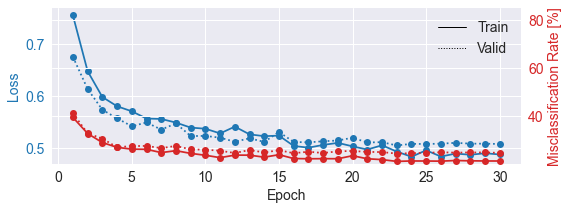

In [9]:
## copied from braindecode
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# Extract loss and accuracy values for plotting from history object
results_columns = ['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy']
df = pd.DataFrame(clf.history[:, results_columns], columns=results_columns,
                  index=clf.history[:, 'epoch'])

# get percent of misclass for better visual comparison to loss
df = df.assign(train_misclass=100 - 100 * df.train_accuracy,
               valid_misclass=100 - 100 * df.valid_accuracy)

plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(8, 3))
df.loc[:, ['train_loss', 'valid_loss']].plot(
    ax=ax1, style=['-', ':'], marker='o', color='tab:blue', legend=False, fontsize=14)

ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
ax1.set_ylabel("Loss", color='tab:blue', fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

df.loc[:, ['train_misclass', 'valid_misclass']].plot(
    ax=ax2, style=['-', ':'], marker='o', color='tab:red', legend=False)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=14)
ax2.set_ylabel("Misclassification Rate [%]", color='tab:red', fontsize=14)
ax2.set_ylim(ax2.get_ylim()[0], 85)  # make some room for legend
ax1.set_xlabel("Epoch", fontsize=14)

# where some data has already been plotted to ax
handles = []
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='Train'))
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle=':', label='Valid'))
plt.legend(handles, [h.get_label() for h in handles], fontsize=14)
plt.tight_layout()

In [10]:
import captum
from captum.attr import Saliency, DeepLift
plt.rcParams.update(plt.rcParamsDefault)
def plot_attribution(attribution):
    plt.figure(figsize=(15, 5))
    plt.xticks(np.arange(0, 218, step=24),np.round(np.arange(-0.2, 0.75, step=0.1),2))
    plt.yticks(np.arange(0, 28, step=1),
           ['FP1','F3','F7','FC3','C3','C5','P3','P7','PO7','PO3','O1','Oz','Pz','CPz',
            'FP2','Fz','F4','F8','FC4','FCz','Cz','C4','C6','P4','P8','PO8','PO4','O2'])
    plt.imshow(attribution[0,:,:].detach().numpy(),aspect="auto",cmap="viridis")

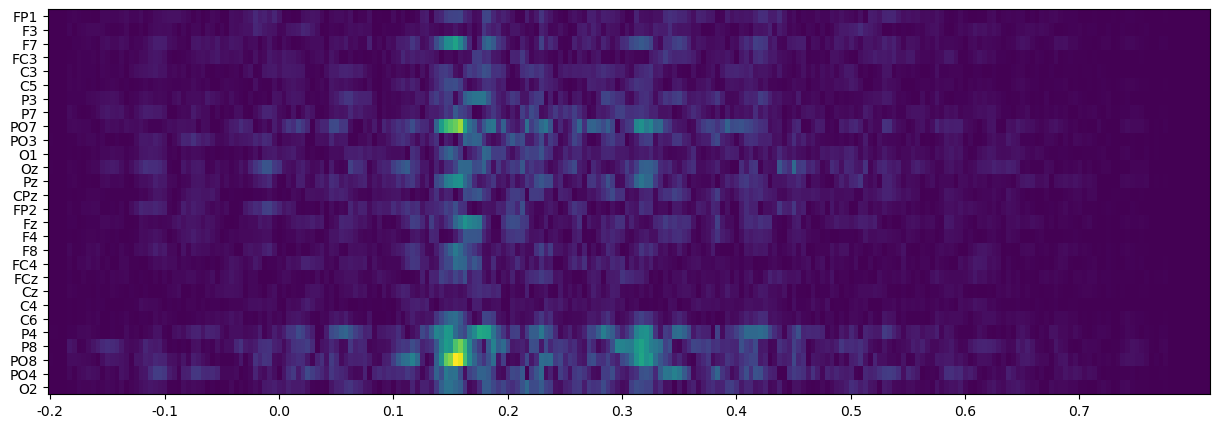

In [13]:
## saliency, single epoch as input
input = dataset[0][0].reshape(1,28,244)
input.requires_grad = True
saliency = Saliency(model)
attribution = saliency.attribute(input, target=0)
plot_attribution(attribution)

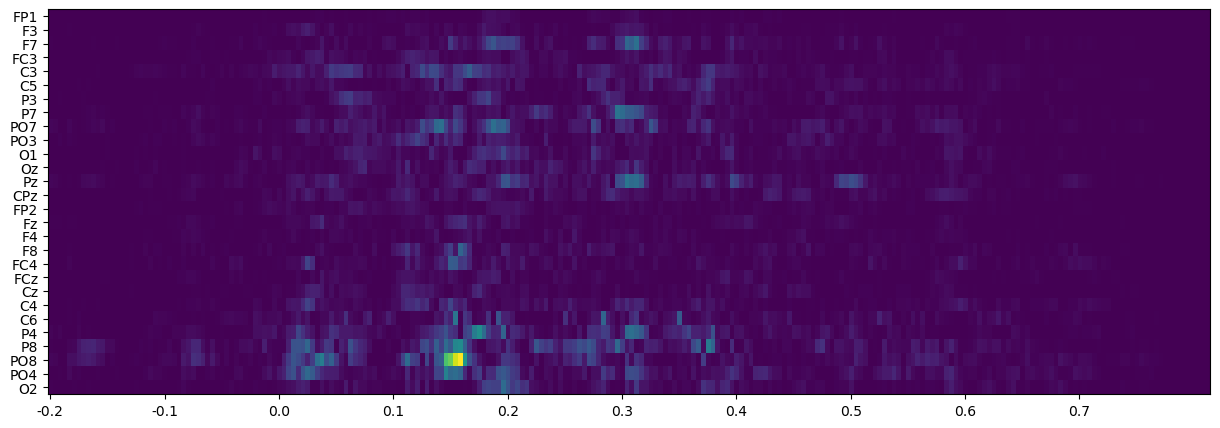

In [14]:
## abs. deeplift, single epoch as input
input = dataset[0][0].reshape(1,28,244)
input.requires_grad = True
dl = DeepLift(model)
attribution = abs(dl.attribute(input, target=0))
plot_attribution(attribution)

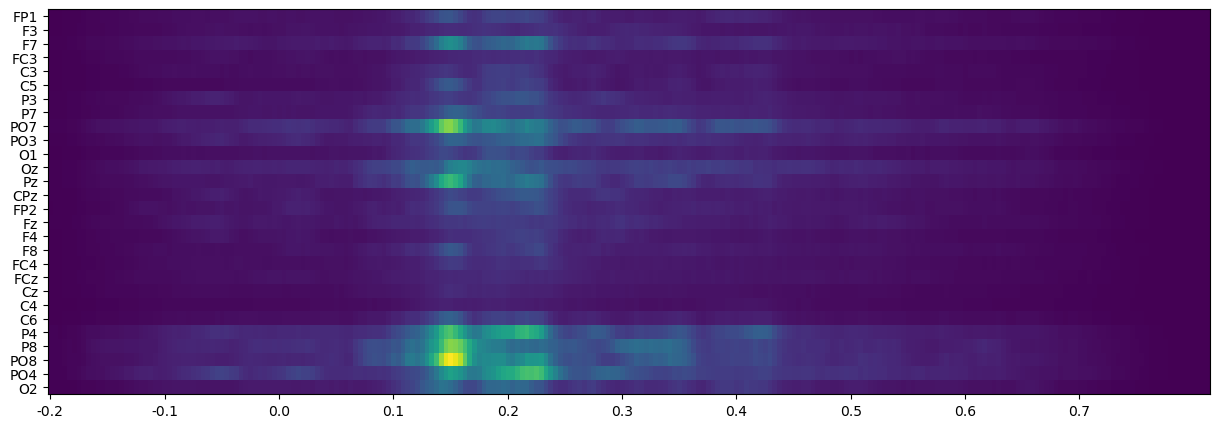

In [15]:
## saliency, 1000 random inputs
saliency = Saliency(model)
attribution = 0
for i in range(1000):
    input = torch.randn(1, 28, 244, requires_grad=True)
    attribution += saliency.attribute(input, target=0)
plot_attribution(attribution)

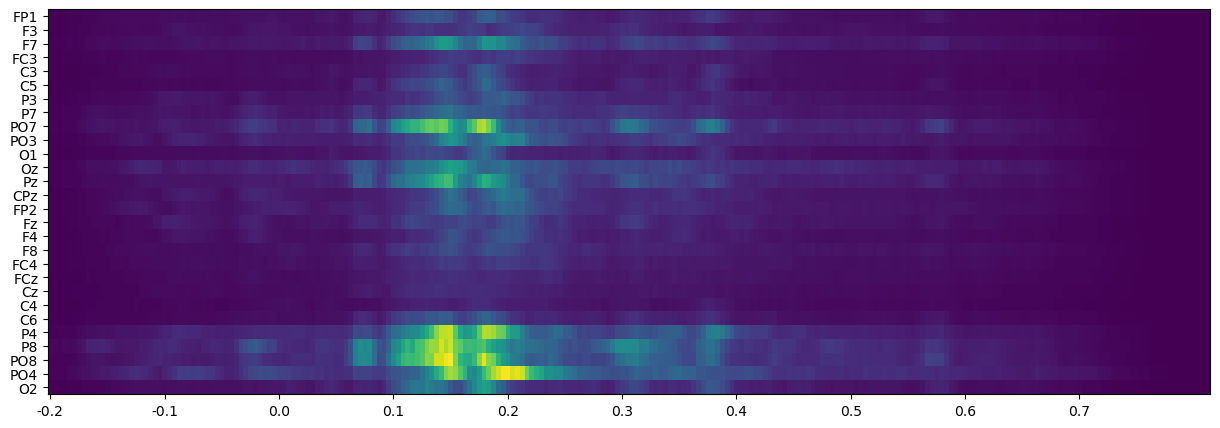

In [16]:
## abs. deeplift, 1000 random inputs
dl = DeepLift(model)
attribution = 0
for i in range(1000):
    input = torch.randn(1, 28, 244, requires_grad=True)
    attribution += abs(dl.attribute(input, target=0))
plot_attribution(attribution)

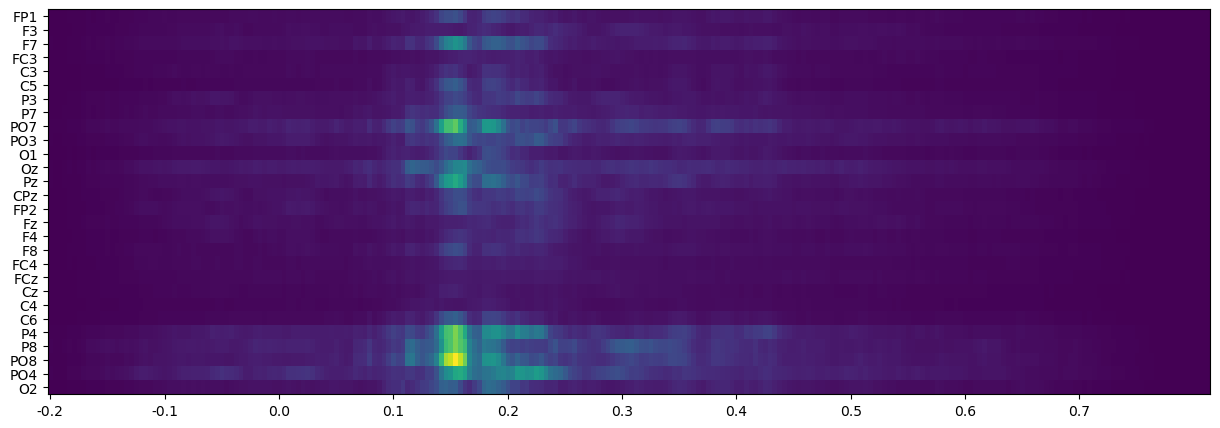

In [19]:
## saliency, all epochs as input (probably better to use validation set only)
saliency = Saliency(model)
attribution = 0
for i in np.arange(0,6400):
    input = dataset[i][0].reshape(1,28,244)
    input.requires_grad = True
    attribution += saliency.attribute(input, target=0)
plot_attribution(attribution)

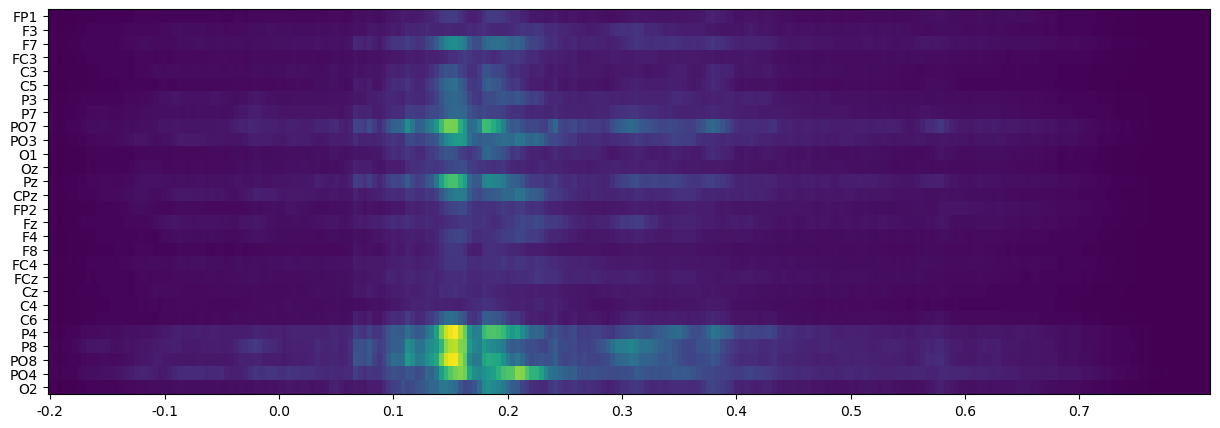

In [18]:
## abs. deeplift, all epochs as input
dl = DeepLift(model)
attribution = 0
for i in np.arange(0,6400):
    input = dataset[i][0].reshape(1,28,244)
    attribution += abs(dl.attribute(input, target=0))
plot_attribution(attribution)